In [1]:
import pytesseract #importing Terssarct Plugin for identify text from the 

In [2]:
print(pytesseract.__version__) 

0.3.8


In [2]:
import cv2 #pip install open-cv Python

In [3]:
print(cv2.__version__)

4.5.3


In [4]:
import matplotlib.pyplot as plt

# Let's Do Configuration 

In [5]:
#Redirecting the tesseract file Path for use the Define Libraries
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [6]:
#Image Read from the Given Path
img = cv2.imread('/Users/Asus/Documents/Atmel Studio/noun.png') 

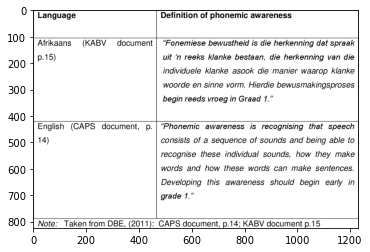

In [7]:
#Displaying the Image that Addressed
plt.imshow(img)

In [8]:
#Creating Boxes for the Letters in the image
imgbox=pytesseract.image_to_boxes(img)

In [9]:
type(imgbox)

str

In [10]:
#The Matrix representation of the Image 
print(imgbox)

~ 1 811 1231 824 0
L 19 794 35 816 0
a 37 793 52 811 0
n 55 794 70 811 0
g 73 787 88 811 0
u 92 793 107 811 0
a 110 793 125 811 0
g 127 787 142 811 0
e 146 793 161 811 0
D 484 794 503 816 0
e 495 793 512 816 0
f 505 793 520 811 0
i 521 794 537 816 0
n 542 794 557 811 0
i 561 794 565 816 0
t 567 793 576 815 0
i 579 794 583 816 0
o 587 793 604 811 0
n 607 794 622 811 0
o 633 793 650 811 0
f 650 794 660 816 0
p 671 787 705 816 0
h 698 787 715 816 0
o 707 793 724 811 0
n 727 794 742 811 0
e 745 793 760 811 0
m 763 794 786 811 0
i 790 794 794 816 0
c 797 793 812 811 0
a 823 793 838 811 0
w 838 794 861 811 0
a 864 793 879 811 0
r 882 794 891 811 0
e 893 793 908 811 0
n 911 794 926 811 0
e 928 793 943 811 0
s 945 793 960 811 0
s 962 793 977 811 0
~ 1 707 1231 729 0
A 18 689 37 711 0
f 38 689 46 711 0
r 48 689 62 711 0
i 61 688 71 711 0
k 65 689 78 711 0
a 80 688 95 706 0
a 97 688 112 706 0
n 115 689 128 706 0
s 131 688 144 706 0
( 188 682 195 711 0
K 198 689 216 711 0
A 217 689 236 711 0
B 23

In [11]:
#Parameters to find the Dimention of the Images
imgH, imgW,_ = img.shape

# Identify the Characters using Image Boxes

In [12]:
#Show Casing the image dimention
img.shape

(824, 1232, 3)

In [13]:
#Iterative Process for Create boxes in the Image
for boxes in imgbox.splitlines():
     boxes = boxes.split(' ')
     x,y,w, h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
     cv2.rectangle(img, (x,imgH-y) , (w,imgH-h), (0,0,255),3)

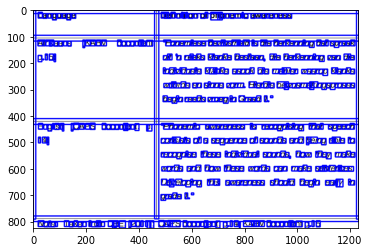

In [14]:
plt.imshow(img) #Default Shows cv2=> In BGR

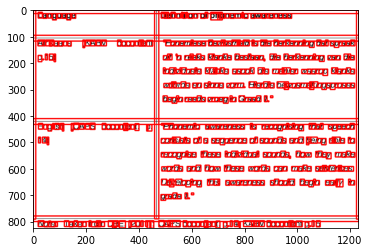

In [15]:
#Converting to RGB image Format
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Without Using Noice Reduction and Edge Detection in the Image (No Filters)

In [16]:
#Converting identified boxes into text Representation
im3char=pytesseract.image_to_string(img)
print(im3char)

 

G8 0 cs Wiens Gesfeen, Gis Gerfienning wan Oi
foGiitbefs Hiais asook Gis mien ea Wienke
ef@7os en efone conn, Gertie baer iingeposes

 

 

 

 



# Handwritten Letter Detection With Enhancing the Quality of Image

## Without Using Any Filters in the Images

In [17]:
#Creating boxes in the image to identify text 
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img2 = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('image', img)
cv2.waitKey(0)

-1

In [18]:
#Another Image 
img2 = cv2.imread('/Users/Asus/Documents/Atmel Studio/Batman.jpg')

In [19]:
#Same Procedure used to create Boxes in text on the Image
h, w, c = img2.shape
boxes = pytesseract.image_to_boxes(img2) 
for b in boxes.splitlines():
    b = b.split(' ')
    img2 = cv2.rectangle(img2, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('image', img2)
cv2.waitKey(0)

-1

In [20]:
#Creating the Images 
im2char=pytesseract.image_to_string(img2)

# Without Applying Any Filters in the Image

In [21]:
print(im2char)

 

Mim Burton Superman Lives 1998)

Boaz Yakin Batman beyond 20)01

Wolfgang Petersen Batman v Superman 2002
Darren Aronofsky Batnian: yean one 20/05)

WW Albirams Siapernntan: flyby 2004)
David S. Goyer The Flash 2007)

David S. Goyer Green arrow 20108

George Millen Justice league midrtal 2009
Zack Snyder Justice league: part 1 2017
Zack Snyden Justice league: part 2 2019

 

 

 

Guhilleitno Del Toro Justice Léague Dark



# Modify the Image using Filters and Noice Reduction

In [30]:
import cv2
import numpy as np

image = cv2.imread('/Users/Asus/Documents/Atmel Studio/noun.jpg')

#Run the Program each time for text recaputuring process form the Image

# OpenCv function to get grayscale image
def get_grayscale(image):                    
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #This Function in OpenCV2 Provides to get GrayScale 

# noise removal in Given Image
def remove_noise(image):
    return cv2.medianBlur(image,5) #Removing Noice in the Picture is Way more Important 
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotation = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotation

#template matching
#def match_template(image, template):
  #return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [31]:
#Using the Filterring Options and Noice Reduction to Identify the texts Clearly
image = cv2.imread('/Users/Asus/Documents/Atmel Studio/Sinhala.jpg')

gray = get_grayscale(image) #Converting Image to a GrayScale Image
thresh = thresholding(gray) #Binary Thresholding Apply for the GrayScale Image
opening = opening(gray)
canny = canny(gray) #Canny Filtering used for the GrayScale Image

language_Config = r'-l sin --psm 6' #Addressing the realted text library in Terreract

#Converting image Matrix into Text Format
image_char=pytesseract.image_to_string(image,config=language_Config)
print(image_char)

print("Digits in the Image Respectively:-")
digit_represent = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(image, config=digit_represent))

print("Characters in the Document Respectively :-")
char_config = r'-c tessedit_char_blacklist=0123456789 -l sin --psm 6'  #Blacklisting the digits in the Document and filtering the language to Sinhala
pytesseract.image_to_string(image, config=char_config)


සුවඳැති කොලවල පමි වදන්‌ ලියපු කාලේ
මුද්දර අලව අලව ලියුමි යවපු තාලේ

සයිකලේ පාග පාග ඒව බබදපු පියුමේ
සමාවෙයං මම නෑ ලියුමි දෙන්නෙ ආයේ

උදේ ඉඳන්‌, හවස්‌ වෙනකල්‌,

අත්‌ මුදල්‌, සමත්ට හික්‍ෂනකල්‌,

අතේ ඇඟිලි රිදෙනකල්‌, කෙල්ල නිදියගන්නකල්‌,
වචන රචන කරන එකම ක්‍රමය...

ලියල යවන ලියුමි වගේ කල්‍යන්නෑ,

[19530 කරල “91-35 කඉලාත්‌ අහුවෙන්නෑ,

කෙල්ල නිදියගන්නකල්‌, මටත්‌ නිදිමත එනකං,
වචන රචන කරන එකම ක්‍රමය 5005

මම යැවුව []161[9 9//656& ඉකෙල්ලල ඔයා කොහෙද කියල,
එයා අහල එවුව හවසට අපි හමුවෙමුදැයි කියල,
11705 කරල කොතැන කීයටදයි දැනගන්නට ඕන,
ඒත්‌ (ර1'950]1[ නෑනෙ [7[10 [16 එකන්‌ ।1116558065ම ගහලා.
උදේ ඉඳන්‌, හවස්‌ වෙනකල්‌,

අඉතත්‌ මුදල්‌, සතේට හිදෙනකල්‌,

අතේ ඇඟිලි රිදෙනකං, කෙල්ල නිදියගන්නකං,
වචන රචන කරන එකම ක්‍රමය 51115

උදේ ඉඳන්‌, හවස්‌ වෙනකල්‌,

අඉත්‌ මුදල්‌, ...

ගායනය : ඩැඩී

Digits in the Image Respectively:-
3
0
3
0
7.
00...
20
03
0-
7.
00032
20.
85.
7
0

...

077

Characters in the Document Respectively :-


"සුවඳැති කොලවල පමි වදන්\u200c ලියපු කාලේ\nමුද්දර අලව අලව ලියුමි යවපු තාලේ\n\nසයිකලේ පාග පාග ඒව බබදපු පියුමේ\nසමාවෙයං මම නෑ ලියුමි දෙන්නෙ ආයේ\n\nඋදේ ඉඳන්\u200c, හවස්\u200c වෙනකල්\u200c,\n\nඅත්\u200c මුදල්\u200c, සමත්ට හික්\u200dෂනකල්\u200c,\n\nඅතේ ඇඟිලි රිදෙනකල්\u200c, කෙල්ල නිදියගන්නකල්\u200c,\nවචන රචන කරන එකම ක්\u200dරමය...\n\nලියල යවන ලියුමි වගේ කල්\u200dයන්නෑ,\n\n[[ා කරල “[-:අ කඉලාත්\u200c අහුවෙන්නෑ,\n\nකෙල්ල නිදියගන්නකල්\u200c, මටත්\u200c නිදිමත එනකං,\nවචන රචන කරන එකම ක්\u200dරමය (]\n\nමම යැවුව []|[ //& ඉකෙල්ලල ඔයා කොහෙද කියල,\nඑයා අහල එවුව හවසට අපි හමුවෙමුදැයි කියල,\n)/) කරල කොතැන කීයටදයි දැනගන්නට ඕන,\nඒත්\u200c (ර'.]ී[ නෑනෙ [[][]- එකන්\u200c ।!]%ම ගහලා.\nඋදේ ඉඳන්\u200c, හවස්\u200c වෙනකල්\u200c,\n\nඅඉතත්\u200c මුදල්\u200c, සතේට හිදෙනකල්\u200c,\n\nඅතේ ඇඟිලි රිදෙනකං, කෙල්ල නිදියගන්නකං,\nවචන රචන කරන එකම ක්\u200dරමය ([\n\nඋදේ ඉඳන්\u200c, හවස්\u200c වෙනකල්\u200c,\n\nඅඉත්\u200c මුදල්\u200c, ...\n\nගායනය : ඩැඩී\n\x0c"

In [40]:
#Run the Filtering Functions 1st
#Using the Filterring Options and Noice Reduction to Identify the texts Clearly
image4 = cv2.imread('/Users/Asus/Documents/Atmel Studio/SinhalaHand.jpg')

gray = get_grayscale(image4) #Converting Image to a GrayScale Image
thresh = thresholding(gray) #Binary Thresholding Apply for the GrayScale Image
opening = opening(gray)
canny = canny(gray) #Canny Filtering used for the GrayScale Image

language_Config = r'-l sin --psm 6' #Addressing the realted text library in Terreract

#Converting image Matrix into Text Format
image_char=pytesseract.image_to_string(image4,config=language_Config)  #WIth the Limitations of the Tesseract Libraries some 
print(image_char)



ණඉමා ඉරියනි, ප්‍රිය ප්‍රසාද

පූ ණීව්‍යන යනි, වාම නුල කරිය
හච්‍රින්‌ අනුරන්‌ ආශිමවිද ලද,
ගිතයේ, බවයේ ශ්‍රී තංසංහි
එලවචණ්‌ ජේණූස්‌ ආ ශී වී දැ, ලදු දාහුචය
සාණ්ත ඉමරයණි, දේ වමැණි යනි!
පාවිචූ අප උඌදදා සා දැනුන්‌ අපේ
මරණ වචේලෙහින්‌' ෆාචනු කළ
මැනව... ආමෙන්‌ පේ.



In [27]:
#Run the Filter Functions 1st and then Run this Segment
#Using the Filterring Options and Noice Reduction to Identify the texts Clearly
image3 = cv2.imread('/Users/Asus/Documents/Atmel Studio/EngWrite.jpg')

gray = get_grayscale(image3) #Converting Image to a GrayScale Image
thresh = thresholding(gray) #Binary Thresholding Apply for the GrayScale Image
opening = opening(gray)
canny = canny(gray) #Canny Filtering used for the GrayScale Image

#language_Config = r'-l sin --psm 6' #Addressing the realted text library in Terreract

#Converting image Matrix into Text Format
image_char=pytesseract.image_to_string(image3)
print(image_char)

#Represent the Digits in the Image

print("Digits in the Image Respectively:-")
digit_represent = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(image3, config=digit_represent))


 

MP a | dh dd

WoW

wT AW

° Fidverlo Clanse.

fn ldver Clause is ong which
performs the function of an adverb in relation
to some word in the Principal Clansg.3t modifies
a_verb, an adjective or an adverb init. It indicates
time, place. )Teason, manner, contrast, or condition.

 

¢ We know where he. lives.
o Make hay while the sun shings

She laghaves as if she werg the queen.

 

Compound Sentence

Compound sentence is made up of two clauses.
ll its “clauses Cif there arg morg two) are of
equal rank, and arg called Co-ordinate Clauses.

o He likes video games but his
sister hates them

o The children were happy and.
the mother was sleeping faut the
father was sad.

Digits in the Image Respectively:-
. . .

-

3

3 .3

.2.

.

2 ..

-

2

-.

444

7 .
.

0

-.

5 .

2 2
2

2

-.

2 .



In [107]:
#Reading the Image using OpenCv
#Using the Filterring Options and Noice Reduction to Identify the texts Clearly
#Compile the Function code above before interpret this Segment
image = cv2.imread('/Users/Asus/Documents/Atmel Studio/batman.jpg')


gray = get_grayscale(image) #Converting Image to a GrayScale Image
thresh = thresholding(gray) #Binary Thresholding Apply for the GrayScale Image
opening = opening(gray)
canny = canny(gray)  #Canny Filtering used for the GrayScale Image

#Converting image Matrix into Text Format
image_char=pytesseract.image_to_string(image)
print(image_char)

#Represent the Digits in the Image

print("Digits in the Image Respectively:-")
digit_represent = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(image, config=digit_represent))

print("Characters in the Document Respectively :-")
char_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(image, config=char_config)


CANCELLED OG MovIES

Tim Burton Superman Lives 1998

Boaz Yakin Batman beyond 2001
Wolfgang Petersen Batman v Superman 2002
Darren Aronofsky Batman: year one 2003
JJ Abrams Superman: flyby 2004

David S. Goyer The Flash 2007

David S. Goyer Green arrow 2008

George Miller Justice league mortal 2009
Zack Snyder Justice league: part 1 2017
Zack Snyder Justice league: part 2 2019
Cyborg 2020

Ben Affleck The Batman 2021

Gareth Evans Deathstroke

Guillermo Del Toro Justice League Dark

1/2

Digits in the Image Respectively:-
1998
2001
2002
2003
2004
.2007
.2008
2009
212017
222019
2020
2021

Characters in the Document Respectively :-


'CANCELLED OG moves &\nTim Burton Superman Lives\nBoaz Yakin Batman beyond\nWolfgang Petersen Batman v Superman\nDarren Aronofsky Batman: year one\nJJ Abrams Superman: flyby\nDavid S. Goyer The Flash /\nDavid S. Goyer Green arrow\nGeorge Miller Justice league mortal O\nZack Snyder Justice league: part  /\nZack Snyder Justice league: part  i\nCyborg\nBen Affleck The Batman\nGareth Evans Deathstroke\nGuillermo Del Toro Justice League Dark\n\x0c'

In [29]:
#Second Example with Appling filters and Noice Reduction
image = cv2.imread('/Users/Asus/Documents/Atmel Studio/noun.png')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
Noice = remove_noise(gray)
dil= dilate(gray)

image_char=pytesseract.image_to_string(image)
print(image_char)


print("Digits in the Image Respectively:-")
digit_represent = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(image, config=digit_represent))

print("Characters in the Document Respectively :-")
char_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'  #Blacklisting the digits in the Document
pytesseract.image_to_string(image, config=char_config)

 

Language

Definition of phonemic awareness

 

Afrikaans (KABV document
p.15)

“Fonemiese bewustheid is die herkenning dat spraak
uit ‘n reeks klanke bestaan, die herkenning van die
individuele klanke asook die manier waarop klanke
woorde en sinne vorm. Hierdie bewusmakingsproses

begin reeds vroeg in Graad 1.”

 

 

English (CAPS document, p.
14)

 

“Phonemic awareness is recognising that speech
consists of a sequence of sounds and being able to
recognise these individual sounds, how they make
words and how these words can make sentences.
Developing this awareness should begin early in
grade 1.”

 

Note: Taken from DBE, (2011):

CAPS document, 9.14; KABV document p.15

 

Digits in the Image Respectively:-
0
.15
.
1.
..
14 2
.
1.
2011.14.15

Characters in the Document Respectively :-


'Definition of phonemic awareness\n\nAfrikaans (KABV document | “Fonemiese bewustheid is die herkenning dat spraak\n\np.i) uit ‘n reeks klanke bestaan, die herkenning van die\nindividuele klanke asook die manier waarop klanke\nwoorde en sinne vorm. Hierdie bewusmakingsproses\nbegin reeds vroeg in Graad .”\n\nEnglish (CAPS document, p. | “Phonemic awareness is recognising that speech\n\n) consists of a sequence of sounds and being able to\nrecognise these individual sounds, how they make\nwords and how these words can make sentences.\nDeveloping this awareness should begin early in\ngrade .”\n\nNote: Taken from DBE, (i/): CAPS document, p.; KABV document p.i\n\x0c'

# Let's Work On Multi-Laguage Texts

In [92]:
img4 = cv2.imread('/Users/Asus/Documents/Atmel Studio/Spanish.png')

## Identifying the Language Resides in the Photo

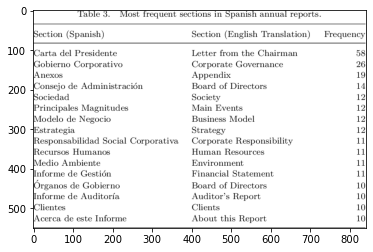

In [108]:
#Displaying the Image that Addressed
plt.imshow(img4)

In [109]:
#Creating Boxes for the Letters in the image
imgbox2=pytesseract.image_to_boxes(img4)

In [110]:
#Iterative Process for Create boxes in the Image
for boxes in imgbox2.splitlines():
     boxes = boxes.split(' ')
     x,y,w, h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
     cv2.rectangle(img4, (x,imgH-y) , (w,imgH-h), (0,0,255),3)

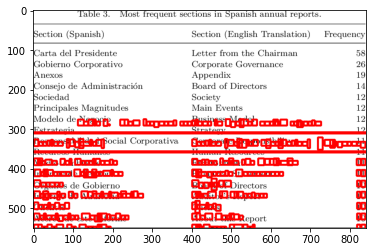

In [111]:
#Converting to RGB image Format
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

In [112]:
#Identify text in the image and return laguage Precentages
text_trans = r'-l spa+sin --psm 6' #From tesseract Library you can find the languages reside in the project
translatetxt = pytesseract.image_to_string(img4, config=text_trans)

from langdetect import detect_langs
detect_langs(translatetxt )

[en:0.7142816341509364, es:0.2857165388332698]

## Segregating the Digits from the Text Photo

In [96]:
#Above img4's Digits Segregated Seperately
digit_represent = r'--oem 3 --psm 6 outputbase digits'   #Tesseract Syntax to whitelisting the Digits only
print(pytesseract.image_to_string(img4, config=digit_represent))

3..
58
26
19
6 14
12
12
12
12
11
11
. 11
6 11
10
10
10
10



## Text Recognition in a Video 

In [11]:
import numpy as np
font_scale = 1.5  #Providing Text size
font = cv2.FONT_HERSHEY_PLAIN #Open CV Font Type

#cap = cv2.VideoCapture(1)
cap = cv2.VideoCapture("/Users/Asus/Documents/Atmel Studio/Message.mp4") #Importing the Video 

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IDError("Cannot Open WebCam")
ct =0;

#Until the Video is Over Capturing the letters in the Clip
while True:
    ret, frame = cap.read()
    ct= ct+1;
    #Capture the 40 frames per the Second
    if((ct%40)==0):     
        imgH, imgW,_ = frame.shape
        
        x1,y1,w1,h1 = 0,0,imgH,imgW
         
        imgchar= pytesseract.image_to_string(frame) #Creating the Image's text represenation into text
        
        #Draw The Boxes  
        imgboxes = pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes=boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]) ,int(boxes[3]) ,int(boxes[4])
            cv2.rectangle(img, (x,imgH-y) , (w,imgH-h), (255,0,0),3)
            
        cv2.putText(frame,imgchar, (x1 + int(w1/50), y1 + int (h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        #Draw the Images
        
        font= cv2.FONT_HERSHEY_SIMPLEX 
        
        
        
        cv2.imshow("Text Detection", frame) #Detected boxes with letters will be printed in top of the Video
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
        



AttributeError: 'NoneType' object has no attribute 'shape'